In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm

import plotly.express as px

In [36]:
df = pd.read_csv(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\Dubai Houses\Data\Dubai.csv")
print(df.shape)
df.head()

(1905, 38)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [37]:
# Select the 'price' column
price_col = df['price']

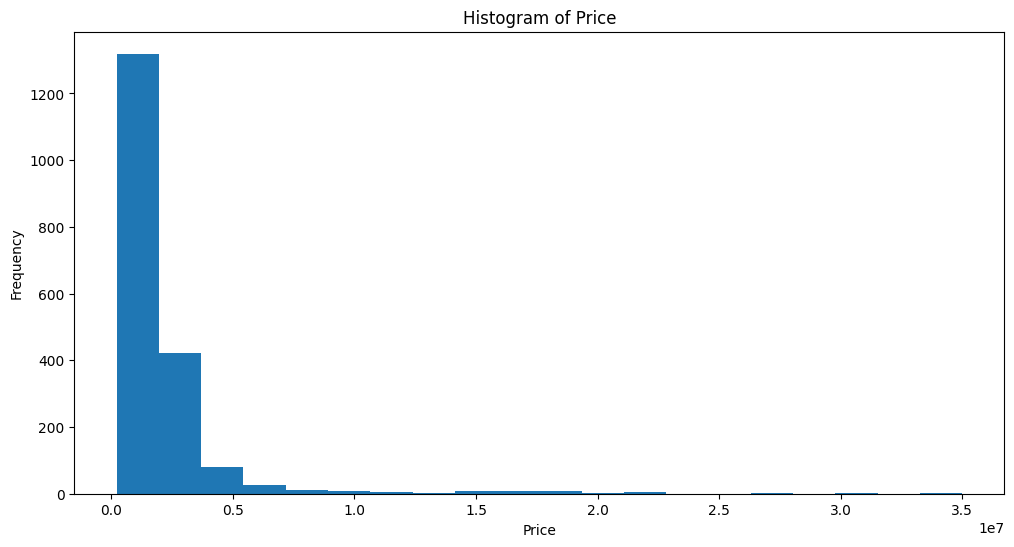

In [38]:
# create a figure with larger size
plt.figure(figsize=(12, 6))
# Create a histogram of the 'price' column
plt.hist(price_col, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

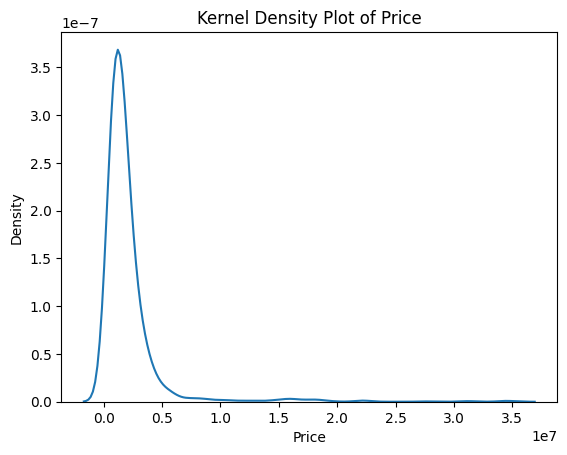

In [39]:
# Create a kernel density plot of the 'price' column
sns.kdeplot(price_col)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.show()

In [40]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Subset data: Remove outliers for "price"
    low, high = df["price"].quantile([0.1, 0.95])
    mask_area = df["price"].between(low, high)
    df = df[mask_area]
    
    return df

In [41]:
df=wrangle(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\Dubai Houses\Data\Dubai.csv")
print(df.shape)
df.head(5)

(1619, 38)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [42]:
# Select the 'price' column
price_col = df['price']

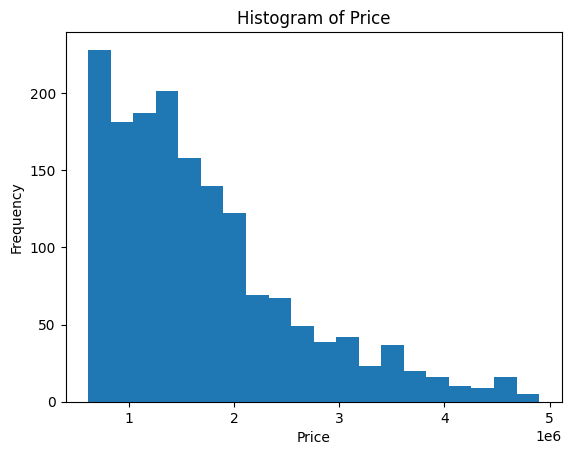

In [43]:
# Create a histogram of the 'price' column
plt.hist(price_col, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

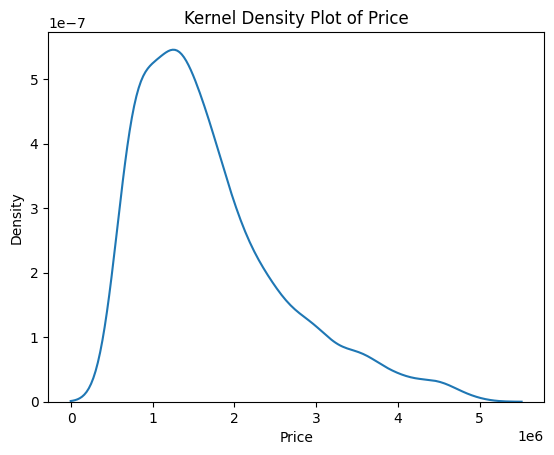

In [44]:
# Create a kernel density plot of the 'price' column
sns.kdeplot(price_col)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.show()

In [45]:
from scipy.stats import skew, kurtosis, norm
# Calculate the skewness and kurtosis of the sample
sample_skewness = skew(price_col)
sample_kurtosis = kurtosis(price_col)

# Print the results
print(f"Sample skewness: {sample_skewness:.2f}")
print(f"Sample kurtosis: {sample_kurtosis:.2f}")

Sample skewness: 1.16
Sample kurtosis: 0.95


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1619 non-null   int64  
 1   neighborhood         1619 non-null   object 
 2   latitude             1619 non-null   float64
 3   longitude            1619 non-null   float64
 4   price                1619 non-null   int64  
 5   size_in_sqft         1619 non-null   int64  
 6   price_per_sqft       1619 non-null   float64
 7   no_of_bedrooms       1619 non-null   int64  
 8   no_of_bathrooms      1619 non-null   int64  
 9   quality              1619 non-null   object 
 10  maid_room            1619 non-null   bool   
 11  unfurnished          1619 non-null   bool   
 12  balcony              1619 non-null   bool   
 13  barbecue_area        1619 non-null   bool   
 14  built_in_wardrobes   1619 non-null   bool   
 15  central_ac           1619 non-null   b

In [58]:
# Get a list of numerical columns
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
# Get a list of categorical and boolean columns
categorical_cols = list(df.select_dtypes(include=['object']).columns)
# Get a list of categorical and boolean columns
boolean_cols = list(df.select_dtypes(include=['bool']).columns)

In [59]:
df[numerical_cols].describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.619000e+03,1619.000000,1619.000000,1.619000e+03,1619.000000,1619.000000,1619.000000,1619.000000
mean,7.569097e+06,25.120556,55.209970,1.708282e+06,1368.836936,1290.251575,1.834466,2.534280
std,1.991788e+05,0.060922,0.068012,8.982773e+05,604.436385,496.783917,0.809262,0.952794
min,5.528049e+06,24.865992,55.105457,6.105030e+05,314.000000,361.870000,0.000000,1.000000
25%,7.557670e+06,25.075409,55.144174,1.020944e+06,898.000000,907.545000,1.000000,2.000000
50%,7.629446e+06,25.099422,55.205980,1.499000e+06,1303.000000,1194.680000,2.000000,2.000000
75%,7.669401e+06,25.189840,55.271797,2.100000e+06,1680.000000,1603.655000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,4.900000e+06,5757.000000,4090.910000,4.000000,6.000000


In [60]:
df[categorical_cols].describe()

,neighborhood,quality
count,1619,1619
unique,49,4
top,Dubai Marina,Medium
freq,278,963


In [61]:
df[boolean_cols].describe()

,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
count,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,...,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,True,True,False,True,True,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
freq,1388,1038,1157,1393,1136,1075,1084,1477,1028,991,...,1568,1061,1077,1199,1454,1453,1540,1274,1043,1379


In [62]:
Boolen_value_counts_df =pd.DataFrame()
for col in boolean_cols :
    Boolen_value_counts_df[col] =df[col].value_counts(normalize=True).to_frame()
    #print(f"Value counts for column '{col}':\n{value_counts_df}\n{'-'*50}\n")
Boolen_value_counts_df



,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
False,0.857319,0.358863,0.285361,0.860408,0.298332,0.33601,0.669549,0.912292,0.63496,0.387894,...,0.968499,0.655343,0.334775,0.259419,0.898085,0.897468,0.951204,0.786905,0.644225,0.85176
True,0.142681,0.641137,0.714639,0.139592,0.701668,0.66399,0.330451,0.087708,0.36504,0.612106,...,0.031501,0.344657,0.665225,0.740581,0.101915,0.102532,0.048796,0.213095,0.355775,0.14824


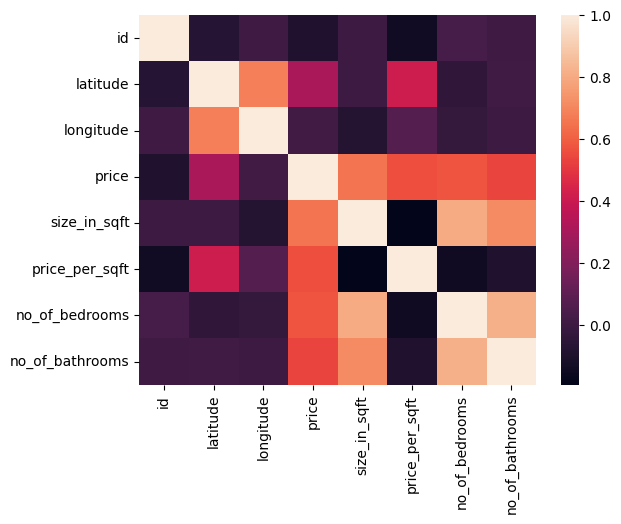

In [63]:
corr=df[numerical_cols].corr()
sns.heatmap(corr)
plt.show()

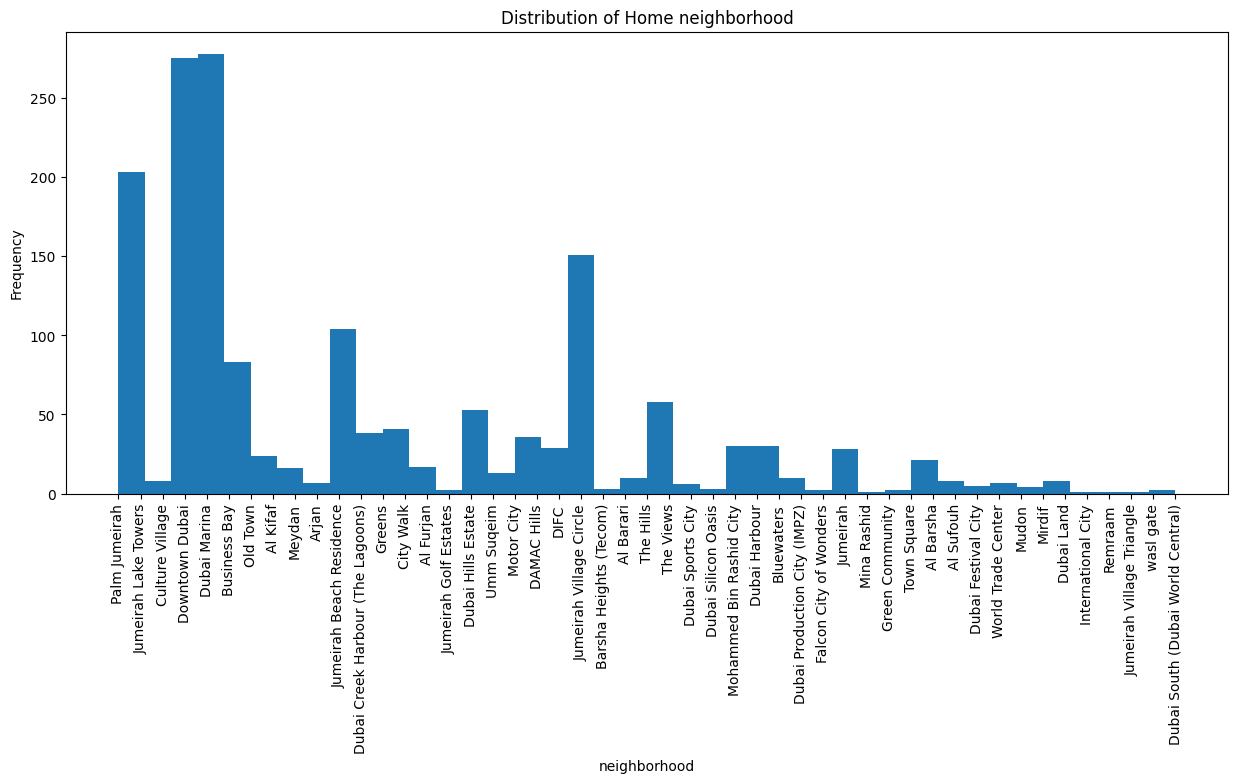

In [64]:
# create a figure with larger size
plt.figure(figsize=(15, 6))

# Build histogram
plt.hist(df["neighborhood"],40)


# Label axes

plt.xlabel("neighborhood")
plt.ylabel('Frequency')

# Add title
plt.title("Distribution of Home neighborhood")

plt.xticks(rotation='vertical')

plt.show()

In [65]:
mean_price_by_neighborhood =df.groupby('neighborhood')['price'].mean().sort_values(ascending=True)


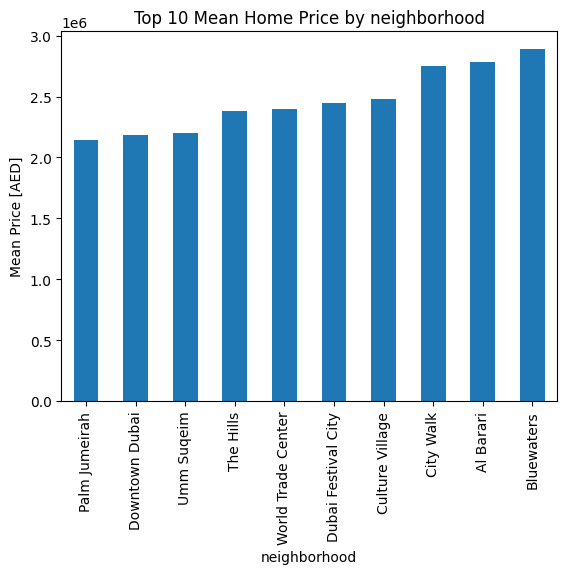

In [66]:
# Build bar chart, label axes, add title
mean_price_by_neighborhood.tail(10).plot(kind="bar")

plt.xlabel("neighborhood")
plt.ylabel("Mean Price [AED]")

# Add title
plt.title('Top 10 Mean Home Price by neighborhood')

plt.show()


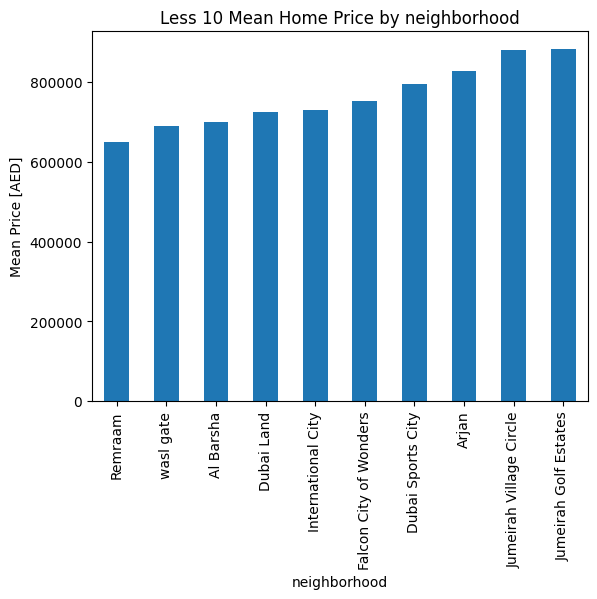

In [67]:
# Build bar chart, label axes, add title
mean_price_by_neighborhood.head(10).plot(kind="bar")

plt.xlabel("neighborhood")
plt.ylabel("Mean Price [AED]")

# Add title
plt.title('Less 10 Mean Home Price by neighborhood')

plt.show()


In [70]:
# create a figure with larger size
plt.figure(figsize=(15, 15))

fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    #width=600,
    #height=600,
    hover_data=["price",'neighborhood',"size_in_sqft"],  # Display price when hovering mouse over house
    color='price',
    color_continuous_scale=px.colors.cyclical.IceFire,
    
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

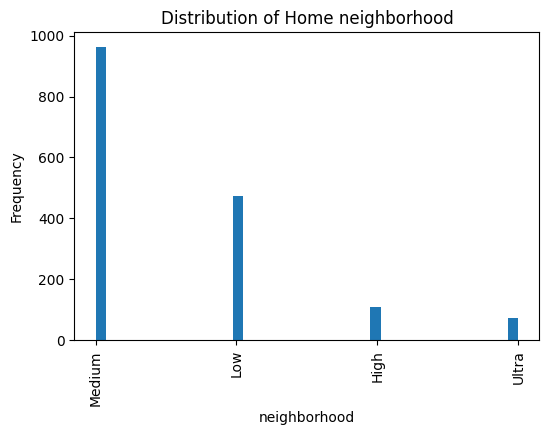

In [76]:
# create a figure with larger size
plt.figure(figsize=(6, 4))

# Build histogram
plt.hist(df["quality"],40)


# Label axes

plt.xlabel("neighborhood")
plt.ylabel('Frequency')

# Add title
plt.title("Distribution of Home neighborhood")

plt.xticks(rotation='vertical')

plt.show()

In [81]:
mean_price_by_quality =df.groupby('quality')['price'].mean().sort_values(ascending=True)


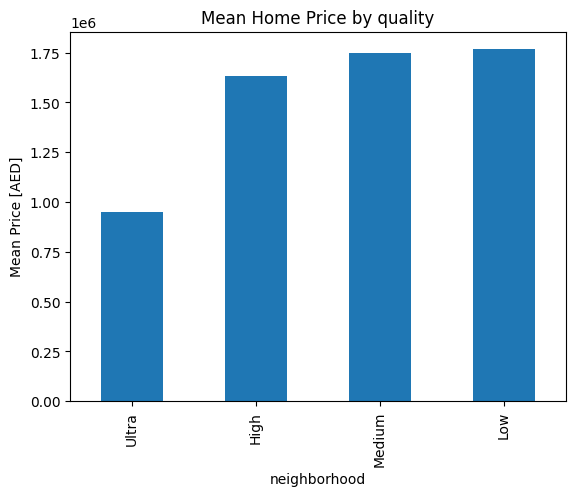

In [84]:
# Build bar chart, label axes, add title
mean_price_by_quality.plot(kind="bar")

plt.xlabel("neighborhood")
plt.ylabel("Mean Price [AED]")

# Add title
plt.title('Mean Home Price by quality')

plt.show()


In [85]:
mean_price_by_quality

quality
Ultra     9.518038e+05
High      1.630962e+06
Medium    1.746473e+06
Low       1.766693e+06
Name: price, dtype: float64

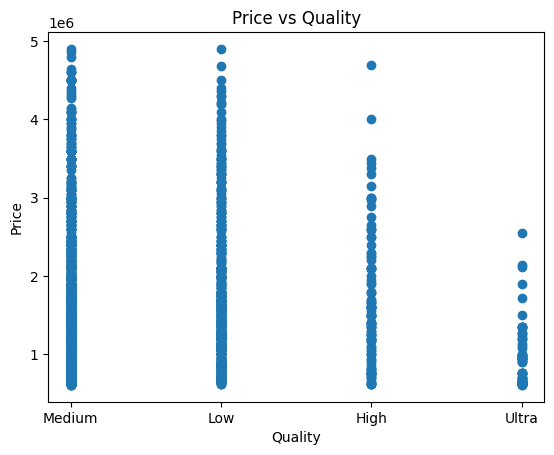

In [97]:
# Create the bar chart
plt.scatter(df['quality'], df['price'])

# Set the labels for the x-axis and y-axis
plt.xlabel('Quality')
plt.ylabel('Price')

# Set the title for the chart
plt.title('Price vs Quality')

# Display the chart
plt.show()

The qulity dont good fetures in this data set 